<a href="https://colab.research.google.com/github/andrew623849/AI-/blob/master/Mnist%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

D:\anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
(X_train_image,y_train_label),(X_test_image,y_test_label)=mnist.load_data()

In [0]:
print("train:",len(X_train_image))
print("test:",len(X_test_image))

train: 60000
test: 10000


In [0]:
print("X_train_image:",X_train_image.shape)
print("y_train_label:",y_train_label.shape)

X_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [0]:
#定義數字影像顯示
import matplotlib.pyplot as plt
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

5


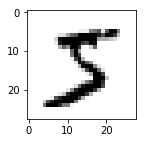

In [0]:
print(y_train_label[0])
plot_image(X_train_image[0])

In [0]:
#更棒的數字顯示函數
import matplotlib.pyplot as plt
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:num=25
    for i in range(0,num):
            ax=plt.subplot(5,5,1+i)
            ax.imshow(images[idx],cmap='binary')
            title="label="+str(labels[idx])
            if len(prediction)>0:
                title+=",prediction="+str(prediction[idx])
            
            ax.set_title(title,fontsize=10)
            ax.set_xticks([]);ax.set_yticks([])
            idx+=1
    plt.show()
    

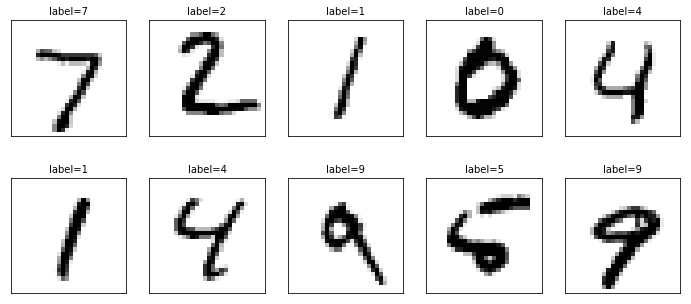

In [0]:
plot_image_labels_prediction(X_test_image,y_test_label,[],0,10)

In [0]:
#資料處理(圖片轉一維陣列28*28=784) label轉ONEHOT

X_Train=X_train_image.reshape(60000,784).astype('float32')
X_Test=X_test_image.reshape(10000,784).astype('float32')
X_Train_normalize=X_Train/255
X_Test_normalize=X_Test/255

y_Train=np_utils.to_categorical(y_train_label)
y_Test=np_utils.to_categorical(y_test_label)

In [0]:
print(y_Train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#開始建立模型
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=X_Train_normalize,y=y_Train,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4391 - acc: 0.8833 - val_loss: 0.2204 - val_acc: 0.9415
Epoch 2/10
 - 2s - loss: 0.1894 - acc: 0.9465 - val_loss: 0.1593 - val_acc: 0.9565
Epoch 3/10
 - 2s - loss: 0.1361 - acc: 0.9613 - val_loss: 0.1352 - val_acc: 0.9622
Epoch 4/10
 - 2s - loss: 0.1064 - acc: 0.9701 - val_loss: 0.1144 - val_acc: 0.9663
Epoch 5/10
 - 2s - loss: 0.0841 - acc: 0.9756 - val_loss: 0.1042 - val_acc: 0.9692
Epoch 6/10
 - 2s - loss: 0.0676 - acc: 0.9804 - val_loss: 0.0947 - val_acc: 0.9719
Epoch 7/10
 - 2s - loss: 0.0556 - acc: 0.9849 - val_loss: 0.0895 - val_acc: 0.9744
Epoch 8/10
 - 2s - loss: 0.0466 - acc: 0.9874 - val_loss: 0.0850 - val_acc: 0.9746
Epoch 9/10
 - 2s - loss: 0.0390 - acc: 0.9895 - val_loss: 0.0876 - val_acc: 0.9743
Epoch 10/10
 - 2s - loss: 0.0328 - acc: 0.9915 - val_loss: 0.0810 - val_acc: 0.9753


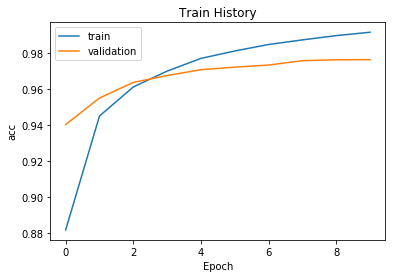

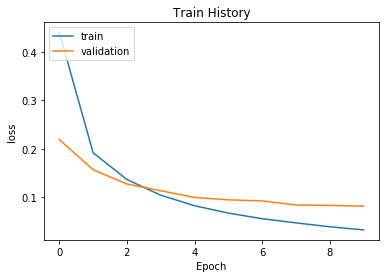

In [0]:
#建立訓練過程顯示函數

import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [0]:
scores=model.evaluate(X_Test_normalize,y_Test)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 44us/step

accuracy= 0.9779


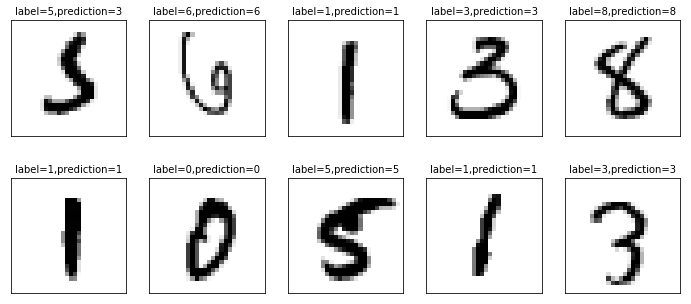

In [0]:
prediction=model.predict_classes(X_Test)

prediction
plot_image_labels_prediction(X_test_image,y_test_label,prediction,340)

In [0]:
import pandas as pd

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,0,3,0,0,1,1,2,0
1,0,1126,4,0,0,0,2,0,3,0
2,7,1,1002,3,1,0,4,6,8,0
3,2,0,2,997,0,1,0,2,5,1
4,4,0,3,1,954,0,3,4,1,12
5,3,1,0,19,1,849,6,2,8,3
6,7,2,1,1,1,3,942,0,1,0
7,1,5,6,2,0,0,0,1007,3,4
8,4,0,1,8,2,1,2,3,950,3


In [0]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [0]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2597,5,3
2810,5,3
3702,5,3
3902,5,3
3968,5,3
4271,5,3


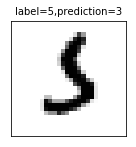

In [0]:
plot_image_labels_prediction(X_test_image,y_test_label,prediction,340,1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=X_Train_normalize,y=y_Train,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 0.2943 - acc: 0.9144 - val_loss: 0.1466 - val_acc: 0.9594
Epoch 2/10
 - 7s - loss: 0.1154 - acc: 0.9666 - val_loss: 0.1046 - val_acc: 0.9699
Epoch 3/10
 - 7s - loss: 0.0738 - acc: 0.9791 - val_loss: 0.0916 - val_acc: 0.9737
Epoch 4/10
 - 7s - loss: 0.0511 - acc: 0.9855 - val_loss: 0.0803 - val_acc: 0.9766
Epoch 5/10
 - 7s - loss: 0.0356 - acc: 0.9904 - val_loss: 0.0839 - val_acc: 0.9764
Epoch 6/10
 - 7s - loss: 0.0260 - acc: 0.9934 - val_loss: 0.0784 - val_acc: 0.9773
Epoch 7/10
 - 7s - loss: 0.0187 - acc: 0.9956 - val_loss: 0.0718 - val_acc: 0.9791
Epoch 8/10
 - 7s - loss: 0.0134 - acc: 0.9969 - val_loss: 0.0709 - val_acc: 0.9796
Epoch 9/10
 - 7s - loss: 0.0089 - acc: 0.9988 - val_loss: 0.0738 - val_acc: 0.9797
Epoch 10/10
 - 7s - loss: 0.0068 - acc: 0.9991 - val_loss: 0.0762 - val_acc: 0.9793


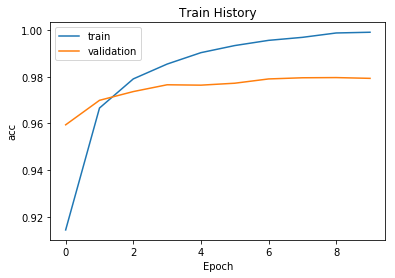

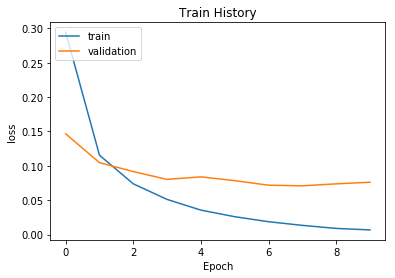

In [0]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model=Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=X_Train_normalize,y=y_Train,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 20s - loss: 0.3683 - acc: 0.8841 - val_loss: 0.1410 - val_acc: 0.9577
Epoch 2/10
 - 19s - loss: 0.1641 - acc: 0.9500 - val_loss: 0.1056 - val_acc: 0.9681
Epoch 3/10
 - 19s - loss: 0.1174 - acc: 0.9639 - val_loss: 0.0878 - val_acc: 0.9733
Epoch 4/10
 - 19s - loss: 0.1003 - acc: 0.9685 - val_loss: 0.0808 - val_acc: 0.9751
Epoch 5/10
 - 20s - loss: 0.0844 - acc: 0.9741 - val_loss: 0.0898 - val_acc: 0.9710
Epoch 6/10
 - 19s - loss: 0.0742 - acc: 0.9757 - val_loss: 0.0756 - val_acc: 0.9775
Epoch 7/10
 - 19s - loss: 0.0670 - acc: 0.9789 - val_loss: 0.0732 - val_acc: 0.9767
Epoch 8/10
 - 20s - loss: 0.0587 - acc: 0.9805 - val_loss: 0.0793 - val_acc: 0.9772
Epoch 9/10
 - 19s - loss: 0.0590 - acc: 0.9809 - val_loss: 0.0763 - val_acc: 0.9791
Epoch 10/10
 - 20s - loss: 0.0544 - acc: 0.9826 - val_loss: 0.0756 - val_acc: 0.9781


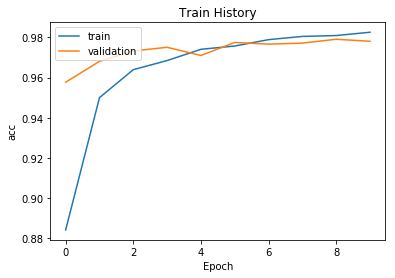

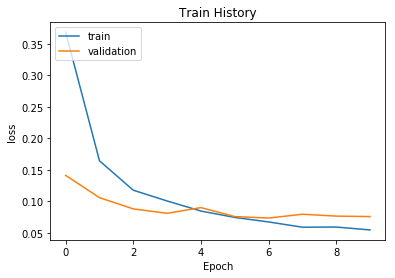

In [0]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [0]:
scores=model.evaluate(X_Test_normalize,y_Test)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 225us/step

accuracy= 0.9801
